In [0]:
#source from : http://ros-developer.com/2017/12/09/density-based-spatial-clustering-dbscan-with-python-code/
import numpy as numpy
import scipy as scipy
import pandas as pd
from sklearn import cluster
from sklearn import datasets, mixture
from sklearn.preprocessing import StandardScaler
from itertools import cycle, islice
import matplotlib.pyplot as plt

In [0]:
# Code to read csv file into Colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
link = 'https://drive.google.com/open?id=1--cNFtx37nWxuzXCo31isoHCykhz2wq9' #The shareable link distance_36-features_attribute_class_anomaly.csv

In [0]:
link = 'https://drive.google.com/open?id=1y98lxMqnA9Zc8zdHhaSeL3_zCUGy0bqR' # The Shareable link Preprocessing.csv
link2 = 'https://drive.google.com/open?id=1Qyl54uAdmET0ICQk4_mOwL1kk_Z5lO56' # The Shareable link Train_data.csv

In [7]:
fluff, id = link.split('=')
print (id) # Verify that you have everything after '='

#fluff2, id2 = link2.split('=')
#print (id2) # Verify that you have everything after '='

1--cNFtx37nWxuzXCo31isoHCykhz2wq9


In [0]:
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('distance_36-features_attribute_class_anomaly.csv')  
distance = pd.read_csv('distance_36-features_attribute_class_anomaly.csv',delimiter=',')

In [0]:
data_select=distance.select_dtypes(include=['float64'])
#data_select.shape
distance = data_select.to_numpy()

In [0]:
print(distance)
print (distance.shape)

[[0.         7.76301684 0.43235825 ... 7.7595646  0.28807035 0.9402159 ]
 [7.76301684 0.         7.77213063 ... 0.31122544 7.75608646 7.80976793]
 [0.43235825 7.77213063 0.         ... 7.77486221 0.4267564  1.32890423]
 ...
 [7.7595646  0.31122544 7.77486221 ... 0.         7.76227899 7.80628012]
 [0.28807035 7.75608646 0.4267564  ... 7.76227899 0.         0.96478809]
 [0.9402159  7.80976793 1.32890423 ... 7.80628012 0.96478809 0.        ]]
(11743, 11743)


In [0]:
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('Preprocessing.csv')  
df = pd.read_csv('Preprocessing.csv',delimiter=',')

downloaded2 = drive.CreateFile({'id':id2}) 
downloaded2.GetContentFile('Train_data.csv')  
df2 = pd.read_csv('Train_data.csv',delimiter=',')

In [0]:
fluff, id = link.split('=')
print (id) # Verify that you have everything after '='

1S1DAyII8K1P1Ky5IODGx_4-Yp-VugWkq


In [0]:
df3.head()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Max,Bwd IAT Min,Fwd Header Length,Bwd Header Length,Fwd Packets/s,Bwd Packets/s,Max Packet Length,Packet Length Mean,Packet Length Std,Packet Length Variance,FIN Flag Count,Average Packet Size,Avg Fwd Segment Size,Avg Bwd Segment Size,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Idle Min
0,-1.334817,2.538183,-0.447805,-0.009662,-0.010331,-0.058138,-0.006952,-0.176769,-0.262714,-0.228541,-0.468169,-0.568686,-0.522601,0.103610,2.413052,-0.304087,-0.381798,-0.390351,-0.053607,-0.43832,-0.284337,-0.35543,-0.381669,-0.114434,-0.339535,-0.241511,-0.274155,0.0,0.001226,0.001561,2.505976,-0.384123,-0.492888,-0.563365,-0.49177,-0.331377,-0.911417,-0.5676,-0.262714,-0.009662,-0.058218,-0.010331,-0.006952,-0.484059,-0.228129,-0.006751,0.002522,-0.346631
1,-1.334811,2.548451,-0.447802,-0.011110,-0.009243,-0.058753,-0.006949,-0.176769,-0.262714,-0.228541,-0.465481,-0.479892,-0.513902,-0.051560,-0.197307,-0.304063,-0.381798,-0.390347,-0.053570,-0.43832,-0.284337,-0.35543,-0.381669,-0.114434,-0.339535,-0.241511,-0.274155,0.0,0.001225,0.001575,-0.213541,-0.384123,-0.492888,-0.563365,-0.49177,-0.331377,0.373079,-0.5676,-0.262714,-0.011110,-0.058833,-0.009243,-0.006949,-0.484344,-0.196557,-0.008495,0.002522,-0.346631
2,-1.334805,2.548505,-0.447804,-0.011110,-0.009243,-0.058753,-0.006949,-0.176769,-0.262714,-0.228541,-0.465481,-0.479892,-0.513902,-0.046746,-0.116325,-0.304076,-0.381798,-0.390349,-0.053590,-0.43832,-0.284337,-0.35543,-0.381669,-0.114434,-0.339535,-0.241511,-0.274155,0.0,0.001225,0.001575,-0.171946,-0.384123,-0.492888,-0.563365,-0.49177,-0.331377,0.373079,-0.5676,-0.262714,-0.011110,-0.058833,-0.009243,-0.006949,-0.484344,-0.196557,-0.008495,0.002522,-0.346631
3,-1.334799,2.069392,-0.447804,-0.011110,-0.009243,-0.058753,-0.006949,-0.176769,-0.262714,-0.228541,-0.465481,-0.479892,-0.513902,-0.041873,-0.034340,-0.304080,-0.381798,-0.390350,-0.053597,-0.43832,-0.284337,-0.35543,-0.381669,-0.114434,-0.339535,-0.241511,-0.274155,0.0,0.001225,0.001575,-0.129835,-0.384123,-0.492888,-0.563365,-0.49177,-0.331377,0.373079,-0.5676,-0.262714,-0.011110,-0.058833,-0.009243,-0.006949,-0.484201,-0.187589,-0.008495,0.002522,-0.346631
4,-1.334792,2.538074,-0.447805,-0.009662,-0.010331,-0.058138,-0.006952,-0.176769,-0.262714,-0.228541,-0.468169,-0.568686,-0.522601,0.103610,2.413052,-0.304087,-0.381798,-0.390351,-0.053607,-0.43832,-0.284337,-0.35543,-0.381669,-0.114434,-0.339535,-0.241511,-0.274155,0.0,0.001226,0.001561,2.505976,-0.384123,-0.492888,-0.563365,-0.49177,-0.331377,-0.911417,-0.5676,-0.262714,-0.009662,-0.058218,-0.010331,-0.006952,-0.484130,-0.228129,-0.006751,0.002522,-0.346631


In [0]:
df3 = df3[selected_features]

In [0]:
df=df3.drop(df3.index[22000:2884780])

In [0]:
df.shape
df.head()

In [0]:
data_select=df.select_dtypes(include=['float64'])
#data_select.shape
Data = data_select.to_numpy()

In [0]:
data_select=df3.select_dtypes(include=['float64'])
#Data = data_select.to_numpy
# print(Data)
#Data['col_name'] = pd.to_numeric(Data['col_name'], errors='coerce')
#print(Data)
Data = StandardScaler().fit_transform(data_select)
print(Data)


In [0]:
print(Data)
print(Data.shape)

In [10]:
#https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_circles.html
#https://scikit-learn.org/stable/auto_examples/cluster/plot_cluster_comparison.html
numpy.random.seed(0)
n_samples = 11743 
noisy_circles = datasets.make_circles(n_samples=n_samples, factor=.5,noise=.05)
#noisy_moons = datasets.make_moons(n_samples=n_samples, noise=.05)
#x,y=noisy_moons 
x,y = noisy_circles 
Data=x.copy()
Data = StandardScaler().fit_transform(Data)
print(Data.shape)
Data

(11743, 2)


array([[-0.81924268, -0.1571942 ],
       [-0.91801418,  0.10362085],
       [ 0.90591941,  0.45759215],
       ...,
       [-0.31378713, -0.79867429],
       [ 0.44312995, -0.77556971],
       [-1.76164713,  0.43745924]])

In [0]:
print(Data)

In [0]:
distance = scipy.spatial.distance.squareform(scipy.spatial.distance.pdist(Data, "euclidean"))
#print(distance)
print(distance)

[[0.         2.15741586 2.08741591 ... 1.44260314 0.82230406 1.07358799]
 [2.15741586 0.         0.40463201 ... 2.40536863 2.37306003 1.09182905]
 [2.08741591 0.40463201 0.         ... 2.57847538 2.16329304 1.02510913]
 ...
 [1.44260314 2.40536863 2.57847538 ... 0.         2.26368561 1.74011264]
 [0.82230406 2.37306003 2.16329304 ... 2.26368561 0.         1.35111724]
 [1.07358799 1.09182905 1.02510913 ... 1.74011264 1.35111724 0.        ]]


In [0]:
del distance

In [0]:
import progressbar
from time import sleep
def set2List(NumpyArray):
    list = []
    for item in NumpyArray:
        #print(item.tolist())
        #list.append(item.tolist())
        list.append(item)
    return list
 
 
def GenerateData():
    x1=numpy.random.randn(5,2)
#     x2x=numpy.random.randn(80,1)+12
#     x2y=numpy.random.randn(80,1)
#     x2=numpy.column_stack((x2x,x2y))
    x2=numpy.random.randn(5,2)+12
    x3=numpy.random.randn(2,2)+8
    x4=numpy.random.randn(5,2)+15
    z=numpy.concatenate((x1,x2,x3,x4))
    return z
 
 
def DBSCAN(Dataset, Epsilon,MinumumPoints,MinimunNeighbor,DistanceMethod = 'euclidean'):
#    Dataset is a mxn matrix, m is number of item and n is the dimension of data
    m,n=Dataset.shape
    Visited=numpy.zeros(m,'int')
    Type=numpy.zeros(m)
#   -1 noise, outlier
#    0 border
#    1 core

# Rule baru setelah belajar
# 0 noise

    ClustersList=[]
    Cluster=[]
    PointClusterNumber=numpy.zeros(m) #buat matrik 0 semua sebanyak data
    PointClusterNumberIndex=1
    PointNeighbors=[]
    PointDeleteNeighbors=[]
    PointDeleteNeighborsIndex=numpy.array([])
   # DistanceMatrix = scipy.spatial.distance.squareform(scipy.spatial.distance.pdist(Dataset, DistanceMethod)) #jarak distance antar data dengan data lain
    DistanceMatrix = distance
    bar = progressbar.ProgressBar(maxval=m, \
    widgets=[progressbar.Bar('=', '[', ']'), ' ', progressbar.Percentage()])
    bar.start()
   # print(m)
    for i in range(m):
        #print("loop %d " %i)
        #print(PointDeleteNeighborsIndex)
       # print(PointClusterNumber)
        #print("visit 1 = %a" %Visited)
        if Visited[i]==0:
            Visited[i]=1
           # print("jarak Matrix - %a" % DistanceMatrix[i])
            PointNeighbors=numpy.where(DistanceMatrix[i]<Epsilon)[0] #Cek core point ke i jarak dengan semua index apakah kurang dari epsilon. jika iya ambil index keberapa dan dengan titik ke berapa
            #print(PointNeighbors)
            #PointDeleteNeighbors=numpy.where((DistanceMatrix[i]>0) & (DistanceMatrix[i]<MinimunNeighbor))[0]
            # print(PointDeleteNeighbors)
           # print("cek 1 PointNeighbors - %a" % PointNeighbors)
            if len(PointNeighbors)<MinumumPoints:
                #print(len(PointNeighbors))
               # print(MinumumPoints)
                Type[i]=-1
            else:
                #print("hai %d" %len(PointNeighbors))
                for k in range(len(Cluster)):
                    Cluster.pop()
                Cluster.append(i)
                PointClusterNumber[i]=PointClusterNumberIndex
               # print("cluster = %a" % Cluster)
                
                
                PointNeighbors=set2List(PointNeighbors) 
                PointDeleteNeighbors=set2List(PointDeleteNeighbors)
               # print(type(PointDeleteNeighbors))
               # print("cek 2 PointNeighbors - %a" % PointNeighbors)
                #print(ClustersList)
                #print("-")
                PointDeleteNeighborsIndex=ExpandClsuter(Dataset[i], PointNeighbors,PointDeleteNeighbors,PointDeleteNeighborsIndex,Cluster,MinumumPoints,MinimunNeighbor,Epsilon,Visited,DistanceMatrix,PointClusterNumber,PointClusterNumberIndex  )
                #print(ClustersList)
                #print("visit 2''' = %a" %Visited)
                Cluster.append(PointNeighbors[:])
                #print("cluster-ap-pn = %a" % Cluster)
                ClustersList.append(Cluster[:])
                #print("cluster List = %a" % ClustersList)
                PointClusterNumberIndex=PointClusterNumberIndex+1
        bar.update(i+1)
    bar.finish()  
    return PointClusterNumber,PointDeleteNeighborsIndex
 
 
 
def ExpandClsuter(PointToExapnd, PointNeighbors,PointDeleteNeighbors,PointDeleteNeighborsIndex,Cluster,MinumumPoints,MinimunNeighbor,Epsilon,Visited,DistanceMatrix,PointClusterNumber,PointClusterNumberIndex  ):
    Neighbors=[]
    DeleteNeighbors=[]
    #print("==============Start of Expand Cluster=============")
   # print("Visited = %a" % Visited)
    #print("DataSet[i]==pointToExpand %a" %PointToExapnd)
    #print("Point Cluster Number %a" %PointClusterNumber)
    #print("Point Cluster Number Index %a" %PointClusterNumberIndex)
    #print("PointNeighbors = %a " %PointNeighbors)
    #print("visit 2 = %a" %Visited)
    for i in PointNeighbors:
        #print("itik = %d" %i)
        if Visited[i]==0:
            #print("aash %d" %i)
            Visited[i]=1
            Neighbors=numpy.where(DistanceMatrix[i]<Epsilon)[0]
            DeleteNeighbors=numpy.where((DistanceMatrix[i]>0) & (DistanceMatrix[i]<MinimunNeighbor))[0]
           # print("Neighbors expn : %a " %Neighbors)
           # print(len(Neighbors))
            if len(Neighbors)>=MinumumPoints:
                #print("hh %d" %i)
                
                #print(DeleteNeighbors)
#                Neighbors merge with PointNeighbors
                for j in Neighbors:
                    #print("J diatas %d" %j)
                    #try-except mirip dengan try-catch
                    try:
                    #index()	Returns the index of the first element with the specified value
                        PointNeighbors.index(j)
                        #print("J = %d" %j)
                        #print("PointNeighbords expn1 : %a" %PointNeighbors)
                    except ValueError:
                        #menambahkan titik j pada poinNeighbors
                        PointNeighbors.append(j)
                        #print("visit 2' = %a" %Visited)
                        #print("PointNeighbords expn2 : %a" %PointNeighbors)
                #print("haywa %d" %i) 
                for k in DeleteNeighbors:
                    #print("k diatas %d" %k)
                    #try-except mirip dengan try-catch
                    try:
                    #index()	Returns the index of the first element with the specified value
                        PointDeleteNeighbors.index(k)
                        #print("J = %d" %j)
                        #print("DeleteNeighbors expn1 : %a" %DeleteNeighbors)
                    except ValueError:
                        PointDeleteNeighbors.append(k)

                        #print(k)
                       # PointDeleteNeighborsIndex=numpy.append(PointDeleteNeighborsIndex,k)
                        #print("DeleteNeighbors expn2 : %a" %DeleteNeighbors)  
                
                PointDeleteNeighborsAsArray = numpy.asarray(PointDeleteNeighbors)  
                
                # print(type(PointDeleteNeighborsAsArray))
                # print(type(PointDeleteNeighborsIndex))
                PointDeleteNeighborsIndex = numpy.unique(numpy.unique(numpy.concatenate((PointDeleteNeighborsAsArray,PointDeleteNeighborsIndex),0)))
                #print(PointDeleteNeighborsIndex)
            #print("tritri %d" %i)
        #print(i)
        if PointClusterNumber[i]==0:
            #print("Nilai i : %d" %i)
            #print("Cluster before : %a" %Cluster)
            Cluster.append(i)
           # print("Cluster after : %a" %Cluster)            
            PointClusterNumber[i]=PointClusterNumberIndex
            
            #print("visit 2'' = %a" %Visited)
            
        #print("cek ahh %d" %i)
    #print("==============End of Expand Cluster=============")
    return PointDeleteNeighborsIndex
 

In [0]:
#Generating some data with normal distribution at 
#(0,0)
#(8,8)
#(12,0)
#(15,15)
#Data=GenerateData()
print(Data)
#m,n=Data.shape
#print(m)
#print(n)
#PointClusterNumber=numpy.zeros(400)
#print(PointClusterNumber)
#Adding some noise with uniform distribution 
#X between [-3,17],
#Y between [-3,17]
noise=scipy.rand(10,2)*20 -3
 
Noisy_Data=numpy.concatenate((Data,noise))
size=20
#print(Noisy_Data)

DistanceMatrix = scipy.spatial.distance.squareform(scipy.spatial.distance.pdist(Data, 'euclidean'))
#print(DistanceMatrix[1])
#print(DistanceMatrix.shape)
#print(DistanceMatrix)

[[-0.67799938 -0.69875698]
 [ 0.93143746  0.19139133]
 [ 0.54829131 -0.00601715]
 ...
 [-0.34518816 -0.35804797]
 [ 0.01719727 -0.94513802]
 [ 0.91377877 -0.59884164]]


In [0]:
#https://stackoverflow.com/questions/17192158/nameerror-global-name-xrange-is-not-defined-in-python-3
fig = plt.figure()
#ax1=fig.add_subplot(2,1,1) #row, column, figure number
#ax2 = fig.add_subplot(2,1,2)
 
#ax1.scatter(Data[:,0],Data[:,1], alpha =  0.5 ) #only data
#ax1.scatter(noise[:,0],noise[:,1],color='red' ,alpha =  0.5) #data with noise
#ax2.scatter(noise[:,0],noise[:,1],color='red' ,alpha =  0.5) #only noise
 
import time
start_time = time.time()
Epsilon = 3.0
MinumumPoints=10
MinimunNeighbor=2.0
result,v = DBSCAN(Data,Epsilon,MinumumPoints,MinimunNeighbor)
#result =DBSCAN(data_array,0.7,10)


n_clusters_ = len(set(result)) - (1 if 0 in result else 0) #cluster terbentuk 4 ( label cluster {0, 1, 2, -1} ). label -1 artinya noise. 
#print(result)
n_noise_ = list(result).count(0)
print("--- %s seconds ---" % (time.time() - start_time))


[                                                                        ] N/A%

In [0]:
print(v.shape)
print(n_clusters_)
print(n_noise_)

In [0]:
df = pd.DataFrame(data=v)
df.head

In [51]:
from google.colab import drive
drive.mount('drive',force_remount=True)
df.to_csv('36-features_attribute_class_anomaly-eps_3.0-MinPoints_10-MinNeighbor_2.0.csv')
!cp 36-features_attribute_class_anomaly-eps_3.0-MinPoints_10-MinNeighbor_2.0.csv "drive/My Drive/Colab Notebooks/Result V/"

Mounted at drive


[]


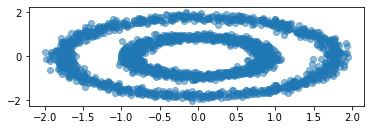

In [0]:
print(v)
v=v.astype(int)
#for k in v:
    #print(k)
    #print(Data[k])
    #Data=numpy.delete(Data,k,0)
Data = numpy.delete(Data,v,0)
fig2 = plt.figure()
ax3=fig2.add_subplot(2,1,1) #row, column, figure number
ax3.scatter(Data[:,0],Data[:,1], alpha =  0.5 ) #only data

In [0]:
print(v.shape)

(0,)


In [0]:
print(Data.shape)
#printed numbers are cluster numbers
n_clusters_ = len(set(result)) - (1 if 0 in result else 0) #cluster terbentuk 4 ( label cluster {0, 1, 2, -1} ). label -1 artinya noise. 
#print(list(result).count(2))
n_noise_ = list(result).count(0)
#print(v)
print(n_clusters_)
print(n_noise_)
#print (result)
#print "Noisy_Data"
#print Noisy_Data.shape
#print Noisy_Data
 
# for i in range(len(result)):
#     ax2.scatter(Data[i][0],Data[i][1],color='yellow' ,alpha =  0.5)

# plt.show()

(0, 2)
1
110
